# Trabalho Final da disciplina de Métodos Matemáticos em Engenharia Eletrônica
### <p align="center">Grupo 5</p>

### Integrantes do grupo:    <p align ="center">Wagner Franco da Silva Junior</p>
###                          <p align ="center">Afonso Mateus</p>
###                          <p align ="center">Kevin Flauzino</p>
###                          <p align ="center">Matheus Táboas</p>  

In [2]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import math
import sympy

### Questão 1 - A:

In [3]:
x=0
for i in range(1, 10):
    x = x + ((5*(i**2)) +30) / i**4
    print(i, "-->", x)

i = 11
y = ((5*(i**2)) +30) / i**4

print("\n\nValor final ----> ", x)
print("|erro| < |", y, "|")

1 --> 35.0
2 --> 38.125
3 --> 39.050925925925924
4 --> 39.480613425925924
5 --> 39.72861342592592
6 --> 39.89065046296296
7 --> 40.005186073125394
8 --> 40.090635291875394
9 --> 40.1569361606454


Valor final ---->  40.1569361606454
|erro| < | 0.04337135441568199 |


### Questão 1 - B:

In [4]:
x=0
y=1
i=1
while(y > 0.001): 
    x = x + ((5*(i**2)) +30) / i**4 #S     

    j = i+1
    y = ((5*(j**2)) +30) / j**4  #Erro    

    i = i + 1

i = i - 1
z = ((5*(i**2)) +30) / i**4  #Sn   

print("Termos necessários ----> ", i)
print("Sn ----> ", z)
print("S -----> ", x)
print("|erro| ----> ", y)

Termos necessários ---->  70
Sn ---->  0.0010216576426488964
S ----->  40.62341801305567
|erro| ---->  0.0009930472525607416


### Questão 2 - a

P0(x) = 216.000000000000
P1(x) = 3.0*x + 108.0
P2(x) = 3.0*x - 0.0208333333333333*(x - 36)**2 + 108.0
P3(x) = 3.0*x + 0.000289351851851852*(x - 36)**3 - 0.0208333333333333*(x - 36)**2 + 108.0
P4(x) = 3.0*x - 5.02346965020576e-6*(x - 36)**4 + 0.000289351851851852*(x - 36)**3 - 0.0208333333333333*(x - 36)**2 + 108.0


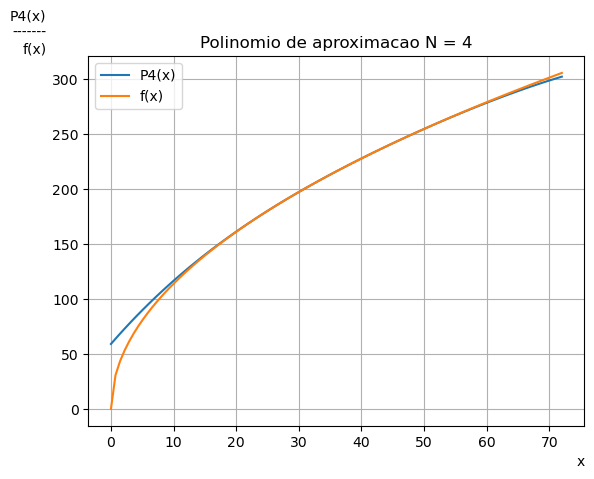

In [23]:
N = 4
inicio = 0
fim = 72
plotar = 'sim'
x = sympy.symbols('x')
f = 36*x**(1/2)
n = 0
P = 0

while n <= N:
    dif = sympy.diff(f, x, n)
        
    P += (dif.subs(x, 36)*(x-36)**n)/sympy.factorial(n)
    
    print (f'P{n}(x) = {P}')

    n += 1
if plotar == 'sim':    
    Poli = sympy.lambdify(x, P, modules=['numpy'])
    funcao = sympy.lambdify(x, f, modules=['numpy'])

    abscissa = np.linspace(inicio, fim, 100)
    ordenada = Poli(abscissa)

    plt.plot(abscissa, ordenada, label='P(x)')
    plt.ylabel (f'P{N}(x)\n-------\nf(x)', rotation=0, loc='top')
    plt.xlabel ('x', loc='right')
    plt.title (f'Polinomio de aproximacao N = {N}')

    plt.plot(abscissa, funcao(abscissa), label='f(x)')

    plt.legend([f'P{N}(x)','f(x)'])

    plt.grid()
    
    plt.show()
    

### Questão 2 - b

In [28]:
x = sympy.symbols('x')
f = 36*x**(1/2)
    
f4 = sympy.diff(f, x, 4)
        
R4 = (f4.subs(x, 36)*(x-36)**4)/sympy.factorial(4)

M = sympy.maximum(f4, x, sympy.Interval(36,37))

R4Taylor = (abs(M)/sympy.factorial(4))*1**4


print(f'|erro| <= {R4Taylor}')

|erro| <= 0.00000456411418668507


### Questão 4 - E, F e G

In [ ]:
#Definindo o domínio e imagem das funções
# z = x + iy   w = u + iv

#Definindo a superfície
x = np.linspace(-2,4,100)
y = np.linspace(-2,2,100)
x,y = np.meshgrid(x,y)
u = x**2 - y**2 - 2*x + 2
v = 2*x*y - 2*y

#Definindo a curva para Re(w)=0
x1 = np.linspace(1 - np.sqrt(3), 1 + np.sqrt(3), 100)
y1 = np.sqrt(1 + (x1-1)**2)
u1 = x1**2 - y1**2 - 2*x1 + 2

#Definindo a curva para o caso 1 de Im(w)=0, x=1
x2 = np.linspace(1,1,100)
y2 = np.linspace(-2,2,100)
u2 = 1 - y2**2 

#Definindo a curva para o caso 2 de Im(w)=0, y=0
x3 = np.linspace(-2,4,100)
y3 = np.linspace(0,0,100)
u3 = (x3-1)**2 + 1

In [29]:
#Plotando o gráfico da superfície e das curvas anteriormente definidas

fig= go.Figure()
fig.add_surface(z=u, x=x, y=y,surfacecolor=v,colorscale = 'jet')
fig.add_scatter3d(x=x1, y=y1, z=u1, mode="lines",name='u=0', line=dict(color="black",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x1, y=-y1, z=u1, mode="lines", showlegend=False, line=dict(color="black",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x2, y=y2, z=u2, mode="lines",name='v=0', line=dict(color="blue",colorscale='blackbody', width=5))
fig.add_scatter3d(x=x3, y=y3, z=u3, mode="lines", showlegend=False, line=dict(color="blue",colorscale='blackbody', width=5))

fig.update_layout(title='w = f(z) = z² - 2z + 2', legend=dict(x=0,y=1), autosize=False, width=800, height=600,scene = dict(xaxis_title='x',yaxis_title='y',zaxis_title='u(x,y)'))

fig.show()

NameError: name 'u' is not defined

### Questão 5 - A: